In [1]:
import numpy as np
import pandas as pd

In [ ]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity="all"

In [2]:
# 그래프에서 한글폰트 지원
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## pandas의 plot으로 데이터 시각화

**pandas의 그래프기능 : matplotlib.pyplot 기반으로 만들어짐**

https://pandas.pydata.org/docs/user_guide/visualization.html

#### 형식1.
- Series_data.plot([kind='graph_kind'][, option])


- DataFrame_data.plot([x=label 혹은 position, y=label 혹은 position,] [kind='graph_kind'][, option])



- kind 옵션
    - line : 선그래프
    - scatter : 산점도(데이터프레임에서만 가능)
    - bar : 수직막대그래프
    - barh : 수평막대그래프
    - hist : 히스토그램
    - pie : 파이그래프
    - box : 박스 플롯
    - area : area 플롯
    - density : Kernel Density Estimation 플롯
    - kde : Kernel Density Estimation 플롯

#### 형식2.


- 수직막대그래프
    - Series_data.plot.bar([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.bar([x=label 혹은 position, y=label 혹은 position][, option])


- 수평막대그래프
    - Series_data.plot.barh([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.barh([x=label 혹은 position, y=label 혹은 position][, option])
    
    
- 파이그래프
    - Series_data.plot.pie([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.pie([x=label 혹은 position, y=label 혹은 position][, option])
    

- 선그래프
    - Series_data.plot.line([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.line([x=label 혹은 position, y=label 혹은 position][, option])


- 히스토그램
    - Series_data.plot.hist([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.hist([x=label 혹은 position, y=label 혹은 position][, option])
  

- 박스플롯
    - Series_data.plot.box([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.box([x=label 혹은 position, y=label 혹은 position][, option])
     

- 산점도
    - DataFrame_data.plot.scatter([x=label 혹은 position, y=label 혹은 position][, option])
    
    
- 커널밀도추정곡선(Kernel Density Estimation)
    - Series_data.plot.kde([x=label 혹은 position, y=label 혹은 position][, option])
    - Series_data.plot.density([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.kde([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.density([x=label 혹은 position, y=label 혹은 position][, option])

## 1. 범주형 데이터 시각화

- 막대그래프, 파이그래프

#### 예. 타이타닉 데이터

In [3]:
df = pd.read_csv('data/titanic.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1) 막대그래프(bar)

#### 타이타닉호 승객의 사망/생존 빈도

In [5]:
surv = df.Survived.value_counts()
surv

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

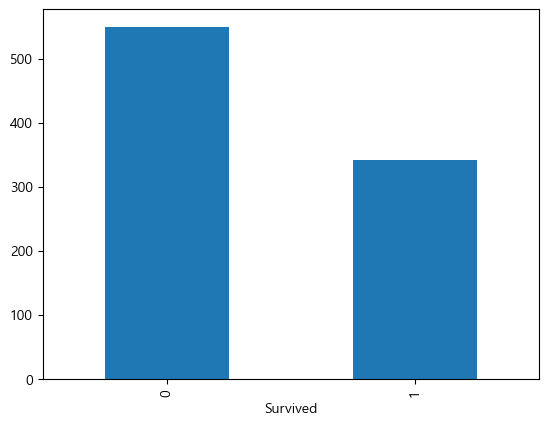

In [6]:
surv.plot(kind='bar')

In [7]:
# surv.rename(index={0:'사망', 1:'생존'})
surv.index = ['사망', '생존']
surv

사망    549
생존    342
Name: count, dtype: int64

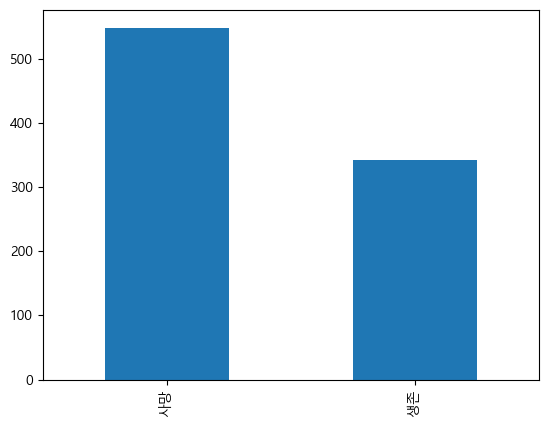

In [9]:
surv.plot(kind='bar')
plt.show()

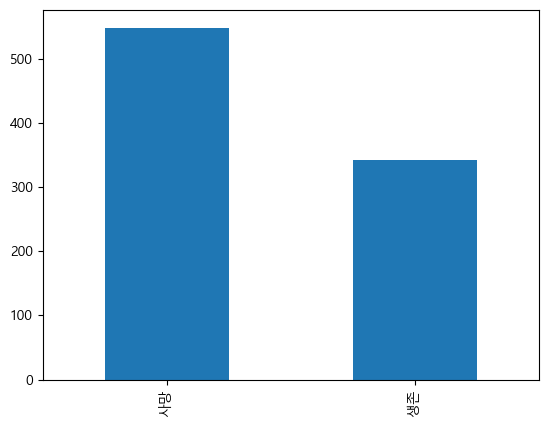

In [10]:
surv.plot.bar()
plt.show()

#### 타이타닉호 승객의 성별 사망/생존 비율

In [13]:
sex_surv = df[['Sex','Survived']].value_counts(sort=False)
sex_surv

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: count, dtype: int64

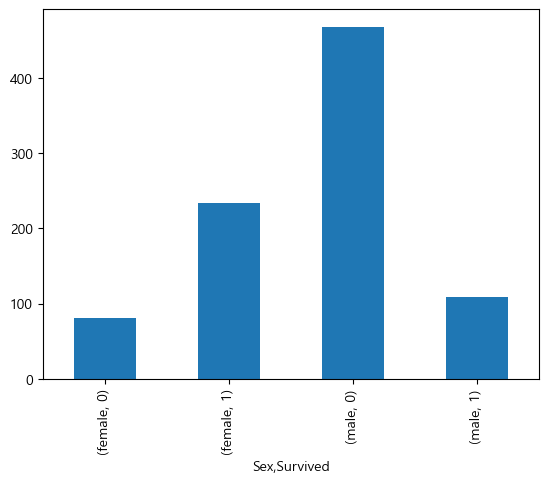

In [15]:
sex_surv.plot.bar()
plt.show()

#### 타이타닉호 승객의 성별에 따른 사망/생존 

In [16]:
sex_surv.index

MultiIndex([('female', 0),
            ('female', 1),
            (  'male', 0),
            (  'male', 1)],
           names=['Sex', 'Survived'])

In [18]:
sex_surv2 = sex_surv.unstack()
sex_surv2.columns = ['사망', '생존']
sex_surv2

,사망,생존
Sex,,
female,81,233
male,468,109


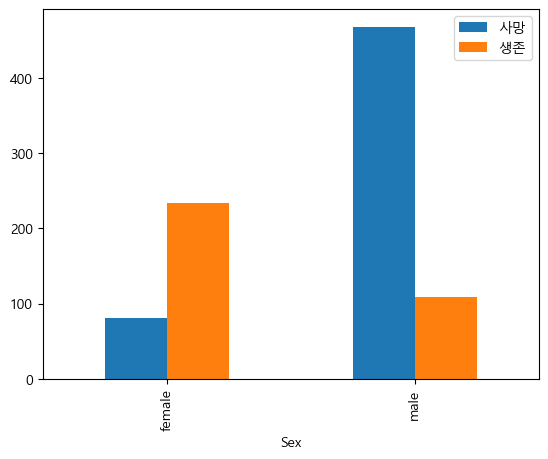

In [19]:
sex_surv2.plot.bar()
plt.show()

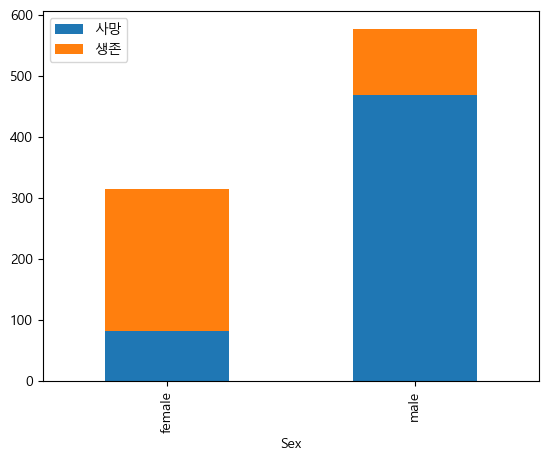

In [21]:
# stacked column chart
sex_surv2.plot.bar(stacked=True)
plt.show()

In [23]:
df2 = pd.DataFrame(np.random.randint(10, size=(10,4)), columns='a b c d'.split())
df2

,a,b,c,d
0,3,7,1,5
1,2,8,7,0
2,6,8,6,5
3,3,8,1,7
4,2,1,3,6
5,1,5,1,7
6,5,7,5,0
7,8,8,3,5
8,6,5,6,0
9,6,1,1,3


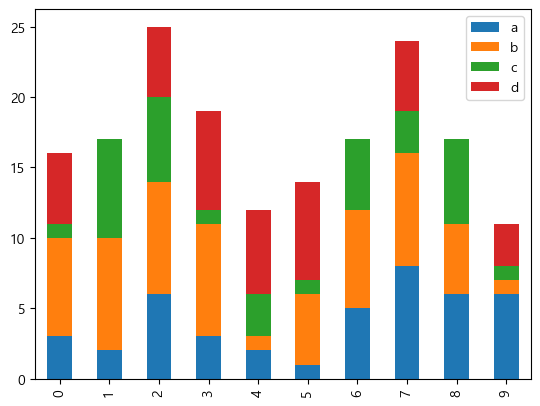

In [25]:
df2.plot.bar(stacked=True)
plt.show()

### 2) 파이그래프(pie)

**타이타닉호 승객의 사망/생존 비율**

In [26]:
surv

사망    549
생존    342
Name: count, dtype: int64

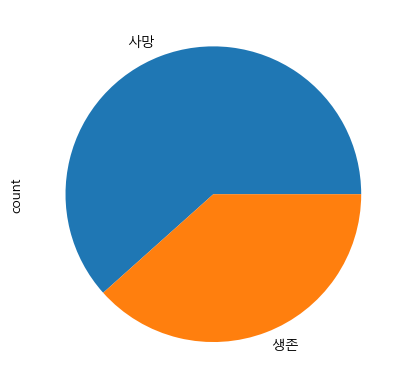

In [27]:
surv.plot.pie()
plt.show()

In [29]:
df3 = pd.Series(np.random.randint(10, size=(4,)), index='a b c d'.split())
df3.name = 'Series cnt'
df3

a    1
b    8
c    1
d    1
Name: Series cnt, dtype: int32

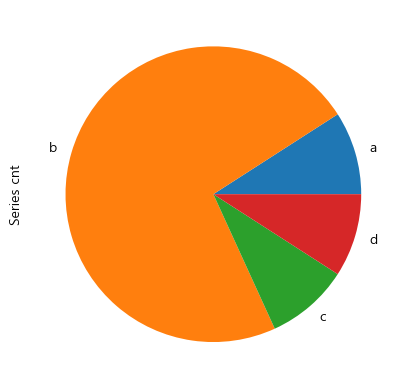

In [31]:
df3.plot.pie()
plt.show()

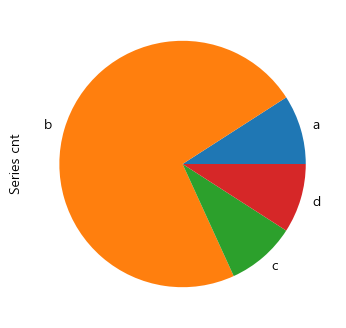

In [32]:
df3.plot(kind='pie', figsize=(4,4))
plt.show()

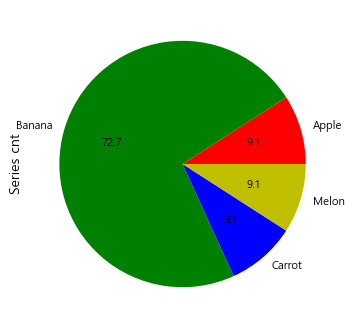

In [36]:
df3.plot(kind='pie', figsize=(4,4),
        labels=['Apple','Banana','Carrot','Melon'],
        colors=['r','g','b','y'],
        autopct='%.1f', fontsize=8)
plt.show()

In [37]:
df4 = pd.DataFrame(np.random.randint(10, size=(4,2)),
                   index='a b c d'.split(),
                   columns=['X', 'Y'])
df4

,X,Y
a,7,3
b,6,9
c,4,2
d,6,3


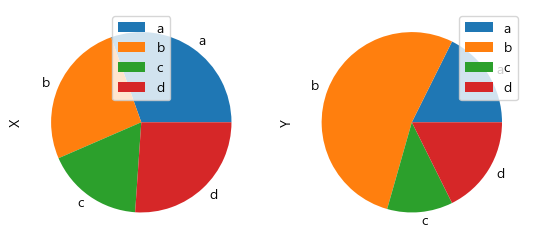

In [39]:
df4.plot(kind='pie', subplots=True)
plt.show()

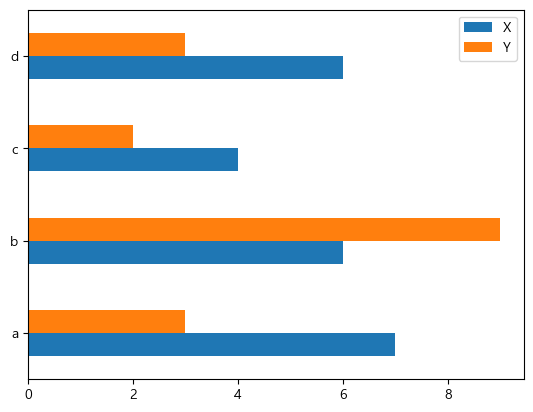

In [40]:
df4.plot.barh()
plt.show()

## 2. 수치형 데이터 시각화

- 선그래프, 히스토그램, 박스플롯, 산점도

### 1) 히스토그램(histogram)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


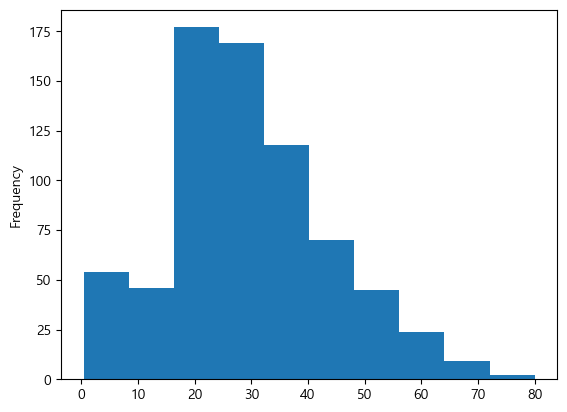

In [43]:
df.Age.plot(kind='hist')
plt.show()

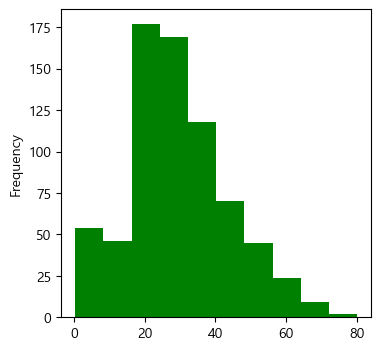

In [44]:
df.Age.plot(kind='hist', color='g', figsize=(4,4))
plt.show()

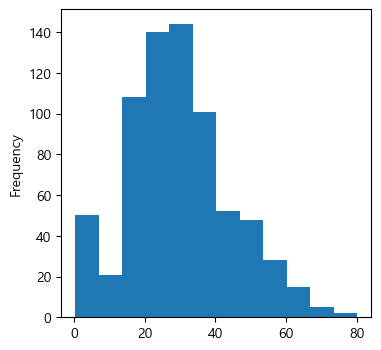

In [45]:
df.Age.plot(kind='hist', bins=12, figsize=(4,4))
plt.show()

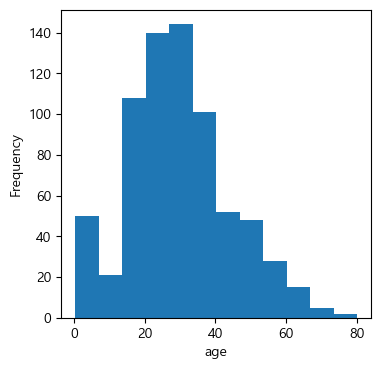

In [46]:
df.Age.plot(kind='hist', bins=12, figsize=(4,4), xlabel='age')
plt.show()

In [47]:
df5 = pd.DataFrame({'A':np.random.randn(1000) + 1,
                    'B':np.random.randn(1000),
                    'C':np.random.randn(1000) - 1})
df5

,A,B,C
0,1.070750,-0.187173,-2.138132
1,1.148937,-0.243819,-2.902092
2,1.306185,-0.634496,-3.294945
3,-0.105540,-2.066364,-0.570798
4,0.929397,-0.036233,-0.886325
...,...,...,...
995,1.101241,-0.228072,-1.206371
996,1.397037,0.403097,-0.346802
997,-0.680617,0.193962,-0.657785
998,2.968117,-0.624685,1.128927


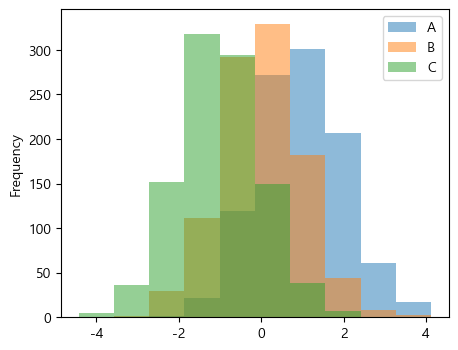

In [53]:
df5.plot.hist(figsize=(5,4), alpha=0.5)
plt.show()

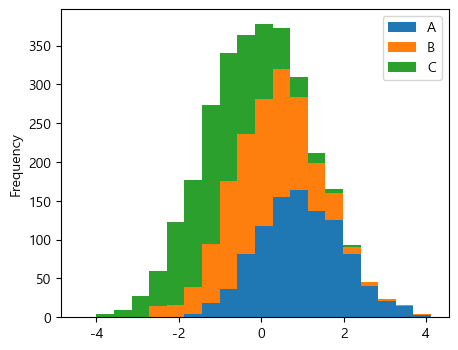

In [54]:
df5.plot.hist(bins=20, figsize=(5,4), stacked=True)
plt.show()

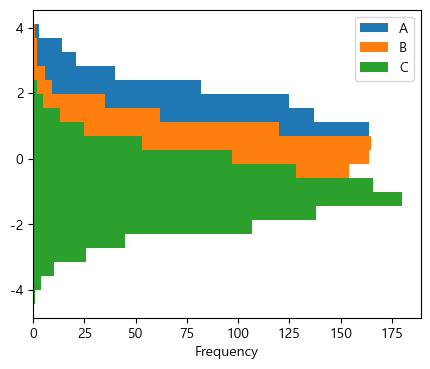

In [55]:
df5.plot.hist(bins=20, figsize=(5,4), orientation='horizontal')
plt.show()

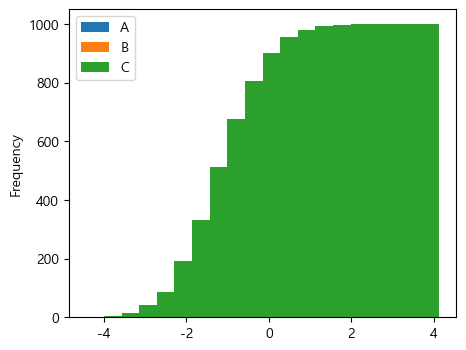

In [56]:
df5.plot.hist(bins=20, figsize=(5,4), cumulative=True)
plt.show()

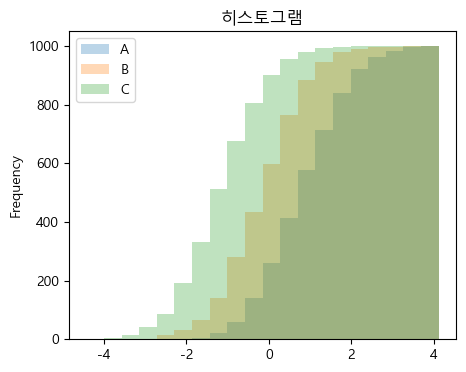

In [57]:
df5.plot.hist(bins=20, figsize=(5,4), cumulative=True, alpha=0.3, title='히스토그램')
plt.show()

### 2) 박스플롯(box-plot)

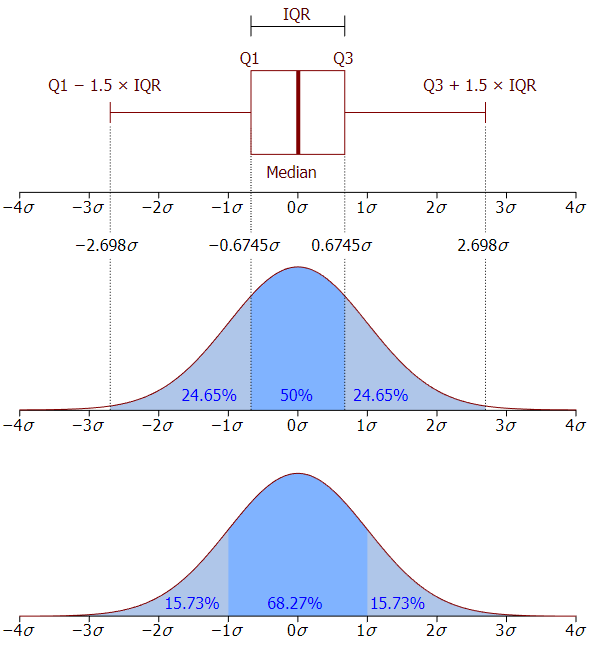

In [58]:
df.Age.skew()

0.38910778230082704

In [59]:
pd.Series(np.random.randn(3000)).skew()

-0.014912944632676227

In [5]:
df.Age.kurt()

0.17827415364210353

In [6]:
pd.Series(np.random.randn(3000)).kurt()

-0.09854305141898889

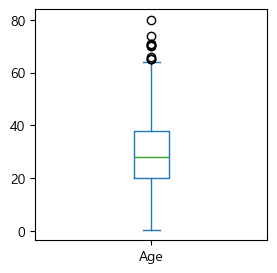

In [8]:
df.Age.plot(kind='box', figsize=(3,3))
plt.show()

In [10]:
df2 = pd.DataFrame(np.random.rand(10,5),
                   columns=['A','B','C','D','E'])
df2

,A,B,C,D,E
0,0.986959,0.175628,0.851793,0.438107,0.038826
1,0.556947,0.306209,0.948220,0.070190,0.819874
2,0.889631,0.915292,0.627337,0.454379,0.984846
3,0.909938,0.196878,0.925694,0.260041,0.155669
4,0.401772,0.617404,0.876583,0.799892,0.936556
5,0.781197,0.098225,0.163976,0.105694,0.875163
6,0.310705,0.540510,0.341249,0.899914,0.592814
7,0.547707,0.076257,0.804981,0.883790,0.938185
8,0.437610,0.745086,0.243187,0.168408,0.529993
9,0.166147,0.546878,0.560531,0.990506,0.323031


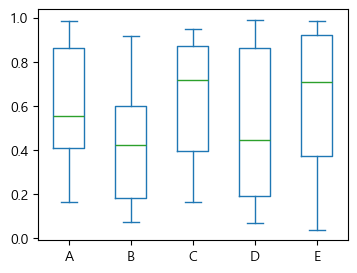

In [11]:
df2.plot.box(figsize=(4,3))
plt.show()

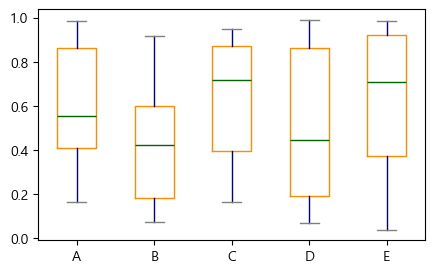

In [12]:
df2.plot.box(color={'medians':'DarkGreen',
                    'boxes':'DarkOrange',
                    'whiskers':'DarkBlue',
                    'caps':'Gray'},
             figsize=(5,3), sym='r+')
plt.show()

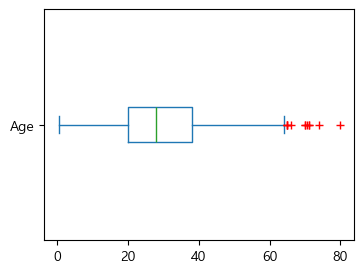

In [14]:
df.Age.plot.box(figsize=(4,3), sym='r+', vert=False)
plt.show()

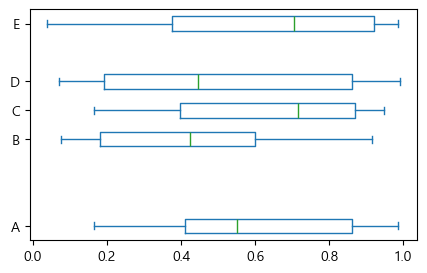

In [16]:
df2.plot.box(figsize=(5,3), vert=False, positions=[1,4,5,6,8])
plt.show()

### 3) 선그래프(line)

**선 그래프는 시간별 추이,변화량을 비교할 때 사용**

In [17]:
df3 = pd.DataFrame({'경유':[2100, 2050,2000, 2010, 2150, 2090],
                    '휘발유':[1900, 1950, 1800, 1955, 1970, 1920]},
                   index=['1월','2월','3월','4월','5월','6월'])
df3

,경유,휘발유
1월,2100,1900
2월,2050,1950
3월,2000,1800
4월,2010,1955
5월,2150,1970
6월,2090,1920


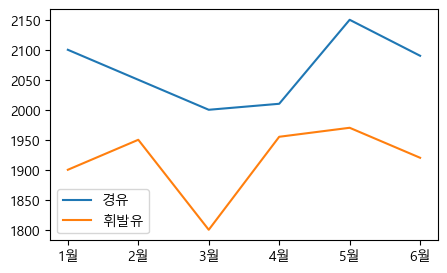

In [19]:
df3.plot(figsize=(5,3))
plt.show()

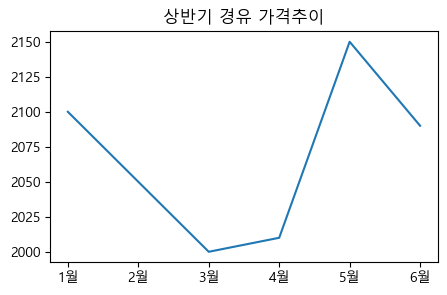

In [21]:
df3.경유.plot(figsize=(5,3), title='상반기 경유 가격추이')
plt.show()

### 4) 산점도(scatterplot)

**산점도(scatter plot) : 두 변수간의 상관성**

In [25]:
df4 = pd.DataFrame({'height':[165, 177, 160, 180, 185, 162, 170],
                    'weight':[62, 67, 55, 74, 90, 49, 64]})
df4

,height,weight
0,165,62
1,177,67
2,160,55
3,180,74
4,185,90
5,162,49
6,170,64


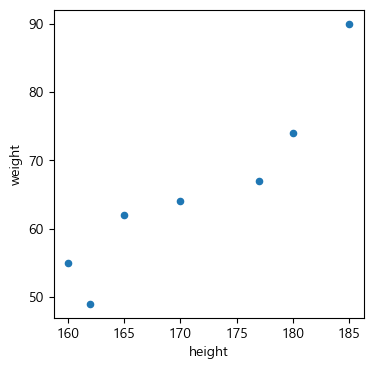

In [26]:
df4.plot(kind='scatter', x='height', y='weight', figsize=(4,4))
plt.show()

In [27]:
df4.corr()

,height,weight
height,1.000000,0.929526
weight,0.929526,1.000000


In [28]:
df5 = pd.DataFrame(np.random.rand(50,4),
                   columns='A B C D'.split())
df5.head()

,A,B,C,D
0,0.735387,0.950768,0.404482,0.233456
1,0.566657,0.745396,0.931205,0.621613
2,0.314418,0.217874,0.955367,0.216188
3,0.431762,0.072000,0.026514,0.847697
4,0.843646,0.949236,0.477005,0.929951


In [29]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


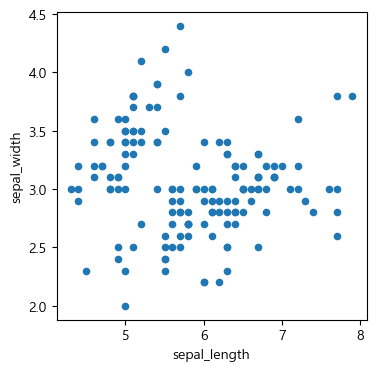

In [31]:
iris.plot.scatter(x='sepal_length', y='sepal_width', figsize=(4,4))
plt.show()

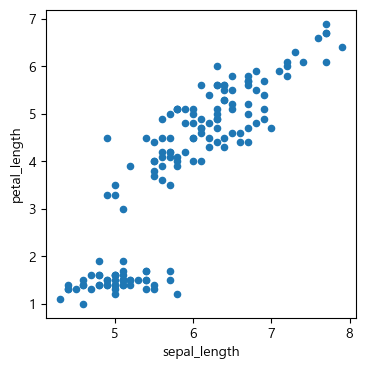

In [32]:
iris.plot.scatter(x='sepal_length', y='petal_length', figsize=(4,4))
plt.show()

In [33]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [34]:
iris.species = iris.species.astype('category')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [35]:
iris.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

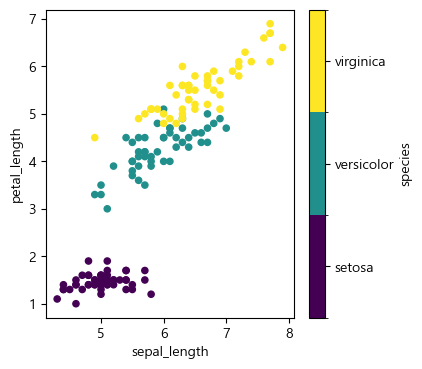

In [37]:
iris.plot.scatter(x='sepal_length', y='petal_length',
                  c='species', figsize=(4,4), cmap='viridis')
plt.show()

In [38]:
df5 = pd.DataFrame(np.random.rand(50,4),
                   columns='A B C D'.split())
df5.head()

,A,B,C,D
0,0.907513,0.604448,0.227721,0.349908
1,0.408793,0.233037,0.875852,0.153579
2,0.434361,0.850983,0.982757,0.463010
3,0.844549,0.693355,0.245829,0.374278
4,0.412629,0.815569,0.257633,0.389755


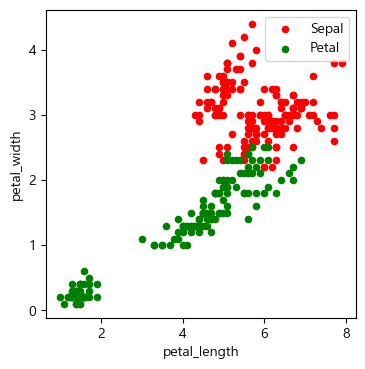

In [42]:
ax = iris.plot.scatter(x='sepal_length', y='sepal_width', figsize=(4,4), color='red', label='Sepal')
iris.plot.scatter(x='petal_length', y='petal_width', color='green', label='Petal', ax=ax)

plt.show()

In [44]:
df5['size'] = df5['C']*100
df5.head()

,A,B,C,D,size
0,0.907513,0.604448,0.227721,0.349908,22.772055
1,0.408793,0.233037,0.875852,0.153579,87.585218
2,0.434361,0.850983,0.982757,0.463010,98.275673
3,0.844549,0.693355,0.245829,0.374278,24.582915
4,0.412629,0.815569,0.257633,0.389755,25.763293


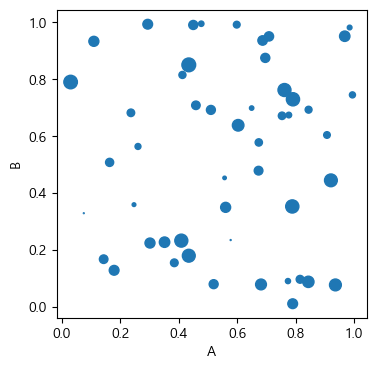

In [45]:
df5.plot.scatter(x='A', y='B', s= 'size', figsize=(4,4))
plt.show()

### 5) 산점도 행렬(scatterplot matrix)

In [46]:
iris.iloc[:, :-1].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [47]:
from pandas.plotting import scatter_matrix

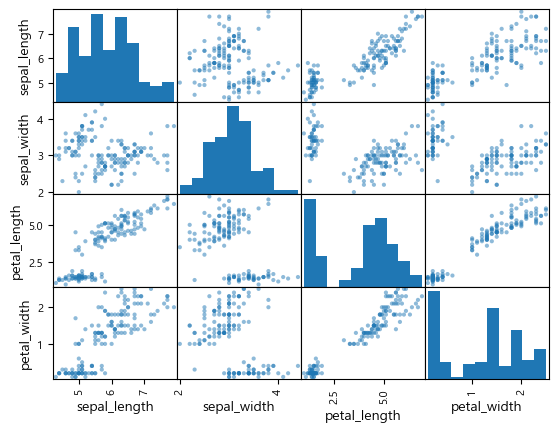

In [48]:
scatter_matrix(iris.iloc[:, :-1])
plt.show()

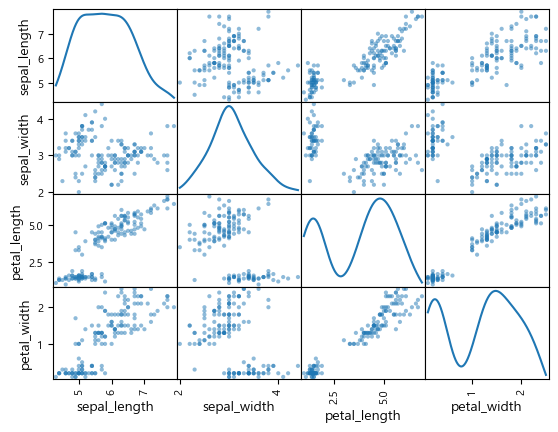

In [49]:
scatter_matrix(iris[:-1], diagonal='kde')
plt.show()

### 6) 밀도함수(density plot)

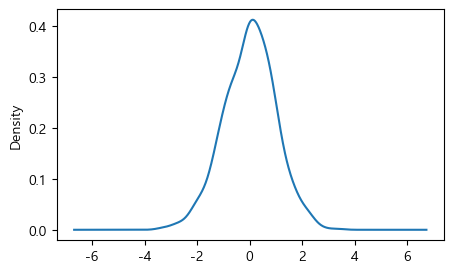

In [50]:
s = pd.Series(np.random.randn(1000))
s.plot.kde(figsize=(5,3))
plt.show()

### 7) 평행좌표 플롯(parallel coordinates plot)

In [51]:
from pandas.plotting import parallel_coordinates

In [52]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


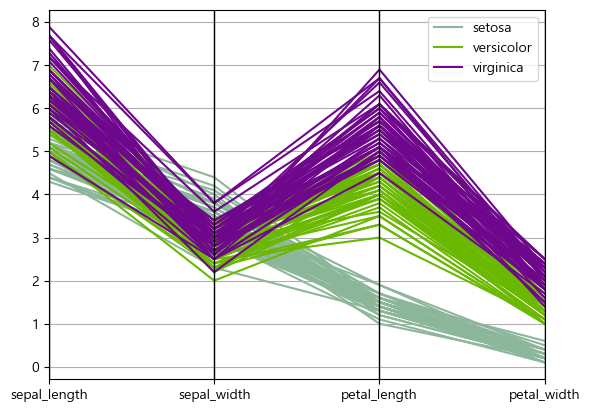

In [53]:
parallel_coordinates(iris, 'species')
plt.show()

-------------